In [1]:
#   import packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandasql
import random
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#   load in dataset and see information

data = pd.read_csv('/Users/darren/2021/projects/nflcombineproject/NFL_2020_Combine.csv')

print(data)
print('\n')
print(data.describe(include='all'))
print('\n')
print(data.info())

     Unnamed: 0             Player Pos   Ht   Wt  40yd  Vertical  Bench  \
0             0         Trey Adams  OL  203  318  5.60      24.5    NaN   
1             1     Hakeem Adeniji  OL  193  302  5.17      34.0   26.0   
2             2      McTelvin Agim  DL  190  309  4.98       NaN   27.0   
3             3       Salvon Ahmed  RB  180  197  4.62      34.5    NaN   
4             4      Brandon Aiyuk  WR  183  205  4.50      40.0   11.0   
..          ...                ...  ..  ...  ...   ...       ...    ...   
332         332        D.J. Wonnum  DL  195  258  4.73      34.5   20.0   
333         333  Dom Wood-Anderson  TE  193  261  4.92      35.0    NaN   
334         334     David Woodward  LB  188  230  4.79      33.5   16.0   
335         335        Chase Young  DL  195  264   NaN       NaN    NaN   
336         336      Jabari Zuniga  DL  190  264  4.64      33.0   29.0   

     Broad Jump  3Cone  Shuttle  
0          92.0    NaN      NaN  
1         115.0    NaN      NaN

In [3]:
#   data cleaning methods
#
#   check for missing data 

print('Missing data: ')
nummiss = data.isnull().sum()
print(nummiss)

print('\n')

print('Percentage of Missing data: ')
percentmiss = (nummiss/data.shape[0]) * 100
print(percentmiss)

Missing data: 
Unnamed: 0      0
Player          0
Pos             0
Ht              0
Wt              0
40yd           70
Vertical       87
Bench         121
Broad Jump     98
3Cone         183
Shuttle       177
dtype: int64


Percentage of Missing data: 
Unnamed: 0     0.000000
Player         0.000000
Pos            0.000000
Ht             0.000000
Wt             0.000000
40yd          20.771513
Vertical      25.816024
Bench         35.905045
Broad Jump    29.080119
3Cone         54.302671
Shuttle       52.522255
dtype: float64


Missing data: 
Unnamed: 0      0
Player          0
Pos             0
Ht              0
Wt              0
40yd            0
Vertical       26
Bench          77
Broad Jump     35
3Cone         116
Shuttle       111
dtype: int64
The intercept is:  [3.45436355]
The coefficient is:  [[0.00533483]]


    Actual  Predicted  Difference
0     4.92   4.702715    0.217285
1     4.57   4.713384   -0.143384
2     5.06   5.150841   -0.090841
3     4.45   4.361285    0.088715
4     4.88   4.718719    0.161281
..     ...        ...         ...
76    4.80   4.814746   -0.014746
77    4.39   4.670706   -0.280706
78    4.39   4.660036   -0.270036
79    4.48   4.510661   -0.030661
80    4.56   4.649366   -0.089366

[81 rows x 3 columns]




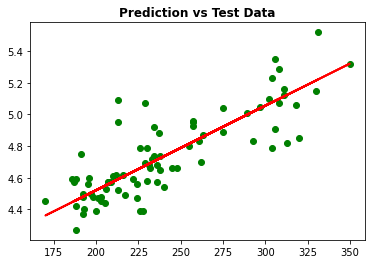



The R-Squared:  0.6777193681030442
The Mean Absolute Error:  0.11085171813166692
The Mean Squared Error:  0.023019570770293006


Predicted 40yd times based on weights: 
[[4.37728977]
 [4.86275963]
 [5.32155532]
 [4.63869661]
 [5.26287215]
 [5.22019348]
 [5.36423399]]


In [10]:
#   model (Simple Linear Regression)
#
#   predict 40yd depending on weight
#
#   we will remove all data that is missing in both 40yd and weight column 

data1 = data.dropna(subset = ['40yd', 'Wt'])

print('Missing data: ')
miss = data1.isnull().sum()
print(miss) 

#   building the model 

x = data1['Wt'].values.reshape(-1, 1)
y = data1['40yd'].values.reshape(-1, 1)


#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(x_train, y_train)

print('The intercept is: ', reg.intercept_)
print('The coefficient is: ', reg.coef_)
print('\n')

yhat = reg.predict(x_test)

res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yhat.flatten(), 'Difference': (y_test - yhat).flatten()})

print(res)

print('\n')

#   plot 
plt.scatter(x_test, y_test,  color = 'green')
plt.plot(x_test, yhat, color = 'red', linewidth = 2)
plt.title('Prediction vs Test Data', weight = 'bold')
plt.show()

print('\n')

r2 = r2_score(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)

print('The R-Squared: ', r2)
print('The Mean Absolute Error: ', mae)
print('The Mean Squared Error: ', mse)

print('\n')

#   Using the test case randomly generated in the previous function for weights, predict 40yds

testcase = np.array([173, 264, 350, 222, 339, 331, 358]).reshape(-1, 1)

prediction = reg.predict(testcase)
print('Predicted 40yd times based on weights: ')
print(prediction)


In [12]:
#   more models (Simple Linear Regression)
#
#   (1) predict Bench based on Weight
#   (2) predict 40yd based on Broad Jump
#   (3) predict 3Cone based on Shuttle 
#
#   Using the test cases randomly generated in the previous functions in main.ipynb 
#
#   we will remove all data that is missing in both respective columns per model number

#   (1)

data1 = data.dropna(subset = ['Bench', 'Wt'])

print('Missing data: ')
miss = data1.isnull().sum()
print(miss) 

print('')

#   building the model 

x = data1['Wt'].values.reshape(-1, 1)
y = data1['Bench'].values.reshape(-1, 1)

#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)

testcase1 = np.array([173, 264, 350, 222, 339, 331, 358]).reshape(-1, 1)

prediction1 = reg.predict(testcase1)
print('Predicted Bench dependent on Weight: ')
print(prediction1)

print('\n')


#   (2)

data2 = data.dropna(subset = ['40yd', 'Broad Jump'])

print('Missing data: ')
miss = data2.isnull().sum()
print(miss) 

print('')

#   building the model 

x = data2['Broad Jump'].values.reshape(-1, 1)
y = data2['40yd'].values.reshape(-1, 1)

#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)

testcase2 = np.array([125, 125, 128, 135, 136, 105, 132]).reshape(-1, 1)

prediction2 = reg.predict(testcase2)
print('Predicted 40yd dependent on Broad Jump: ')
print(prediction2) 

print('\n')


#   (3) 

data3 = data.dropna(subset = ['3Cone', 'Shuttle'])

print('Missing data: ')
miss = data3.isnull().sum()
print(miss) 

print('')

#   building the model 
x = data3['Shuttle'].values.reshape(-1, 1)
y = data3['3Cone'].values.reshape(-1, 1)

#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)

testcase3 = np.array([5, 5, 4, 5, 5, 5, 4]).reshape(-1, 1)

prediction3 = reg.predict(testcase3)
print('Predicted 3Cone dependent on Shuttle: ')
print(prediction3)

Missing data: 
Unnamed: 0      0
Player          0
Pos             0
Ht              0
Wt              0
40yd           26
Vertical       39
Bench           0
Broad Jump     47
3Cone         104
Shuttle       101
dtype: int64

Predicted Bench dependent on Weight: 
[[13.99049673]
 [21.43960481]
 [28.47942123]
 [18.00155493]
 [27.57897959]
 [26.92411295]
 [29.13428787]]


Missing data: 
Unnamed: 0     0
Player         0
Pos            0
Ht             0
Wt             0
40yd           0
Vertical       0
Bench         66
Broad Jump     0
3Cone         85
Shuttle       81
dtype: int64

Predicted 40yd dependent on Broad Jump: 
[[4.5779617 ]
 [4.5779617 ]
 [4.50072074]
 [4.32049184]
 [4.29474485]
 [5.09290144]
 [4.3977328 ]]


Missing data: 
Unnamed: 0     0
Player         0
Pos            0
Ht             0
Wt             0
40yd           3
Vertical       1
Bench         40
Broad Jump     3
3Cone          0
Shuttle        0
dtype: int64

Predicted 3Cone dependent on Shuttle: 
[[8.06892236]


In [13]:
#   the model (Multiple Linear Regression)
#
#   predict 40yd times depending on 3Cone and Shuttle times 
#
#   we will remove all data that is missing in 3Cone and Shuttle columns

data1 = data.dropna(subset = ['3Cone', 'Shuttle', '40yd'])

print('Missing data: ')
miss = data1.isnull().sum()
print(miss) 

print('')

x = data1[['3Cone', 'Shuttle']].values.reshape(-1, 2)
y = data1['40yd'].values.reshape(-1, 1)

#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(x_train, y_train)

print('The intercept is: ', reg.intercept_)
print('The coefficients are: ', reg.coef_)
print('\n')

yhat = reg.predict(x_test)

res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yhat.flatten(), 'Difference': (y_test - yhat).flatten()})

print(res)
print('\n')

r2 = r2_score(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)

print('The R-Squared: ', r2)
print('The Mean Absolute Error: ', mae)
print('The Mean Squared Error: ', mse)


Missing data: 
Unnamed: 0     0
Player         0
Pos            0
Ht             0
Wt             0
40yd           0
Vertical       1
Bench         39
Broad Jump     2
3Cone          0
Shuttle        0
dtype: int64

The intercept is:  [0.57512696]
The coefficients are:  [[0.47147574 0.16611013]]


    Actual  Predicted  Difference
0     4.74   4.725285    0.014715
1     4.60   4.791291   -0.191291
2     5.01   4.751912    0.258088
3     4.66   4.704277   -0.044277
4     4.91   5.001208   -0.091208
5     4.76   4.642986    0.117014
6     4.45   4.513489   -0.063489
7     4.75   4.584747    0.165253
8     4.63   4.617751    0.012249
9     4.74   4.654026    0.085974
10    4.89   4.900218   -0.010218
11    4.68   4.644597    0.035403
12    4.45   4.774899   -0.324899
13    5.08   4.923255    0.156745
14    4.89   4.813522    0.076478
15    4.73   4.730855   -0.000855
16    4.39   4.634412   -0.244412
17    4.85   4.959312   -0.109312
18    4.73   4.794663   -0.064663
19    5.57   5.207165